## CS156 PCW5 Linear Parameter Models

Task1 : Starting tutorial
- Try change the sigma and/or the alpha, and see how this affects the model predictions.

Task2: Temperature in Yosemite
- The model takes the UTC time (in minutes) and fits a straight line to predict the temperature. Notice the poor performance of the model!
- Now expand the representation of the time of day using ideas contained in Section 17.2.3. This turns the single number (minutes) into a much richer representation. Experiment with different numbers of radial basis functions and different widths of the radial basis function.
- Decide on a metric to measure performance and record your performance.


### Task1

centers.shape (6, 1)
heights.shape (4, 1)
weights.shape (4, 1)
x.shape (4, 6)
Original inputs [[1.32]
 [1.45]
 [1.66]
 [1.88]]
RBF repr [[0.81481026 0.97161077 0.98728157 0.85487502 0.63077882 0.39661073]
 [0.66697681 0.8824969  0.99501248 0.95599748 0.78270454 0.54607443]
 [0.41844911 0.65494763 0.87354119 0.99282586 0.96155838 0.79358073]
 [0.21250282 0.39661073 0.63077882 0.85487502 0.98728157 0.97161077]]
Score on training data =  0.9430228201546075
all_x.shape (1000, 1)
expanded_x.shape (1000, 6)
all_y.shape (1000, 1)


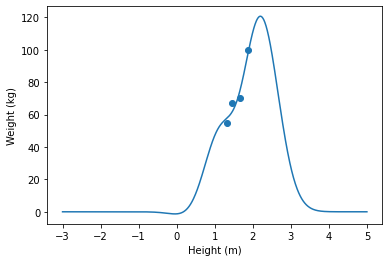

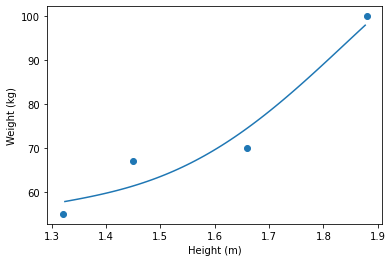

In [1]:
#Task1 
#code from https://github.com/minerva-university/cs156/blob/master/session05/linear_parameter_model.py
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

# Try to predict weight as a function of height.
# Physics would suggest that weight is proportional to volume,
# and volume is proportional to height^3.  However we will
# use a linear parameter model with radial basis functions
# to model this nonlinear relationship.

heights = np.asarray([1.32, 1.45, 1.66, 1.88]).reshape(-1, 1)
weights = np.asarray([55, 67, 70, 100]).reshape(-1, 1)
centers = np.asarray([1.0, 1.2, 1.4, 1.6, 1.8, 2.0]).reshape(-1, 1)
print("centers.shape", centers.shape)
print("heights.shape", heights.shape)
print("weights.shape", weights.shape)

# I recommend playing around with these parameters and seeing how well you fit
# the data.  Changing one of the parameters will change the optimal value of
# the other:
sigma = 0.5
alpha = 0.0001

# New representation:
x = rbf_kernel(heights, centers, gamma=1.0 / sigma)
print("x.shape", x.shape)
print("Original inputs", heights)
print("RBF repr", x)

# Now go and fit a linear model between x and height
regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(x, weights)
print("Score on training data = ", regr.score(x, weights))
all_x = np.linspace(-3.0, 5.0, 1000).reshape(-1, 1)

# New representation:
expanded_x = rbf_kernel(all_x, centers, gamma=1.0 / sigma)
all_y = regr.predict(expanded_x)
print("all_x.shape", all_x.shape)
print("expanded_x.shape", expanded_x.shape)
print("all_y.shape", all_y.shape)

# Show that the predictions tend to zero far away from inputs
plt.figure()
plt.plot(all_x, all_y)
plt.scatter(heights, weights)
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")


# Zoom in and see how well predictions fit the data
zoom_ind = (all_x > heights.min()) & (all_x < heights.max())
plt.figure()
plt.plot(all_x[zoom_ind], all_y[zoom_ind])
plt.scatter(heights, weights)
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.show()

x.shape (4, 6)
Original inputs [[1.32]
 [1.45]
 [1.66]
 [1.88]]
RBF repr [[0.66391576 0.94402748 0.9747249  0.73081129 0.39788192 0.15730007]
 [0.44485807 0.77880078 0.99004983 0.91393119 0.61262639 0.29819728]
 [0.17509966 0.4289564  0.7630742  0.98570318 0.92459451 0.62977038]
 [0.04515745 0.15730007 0.39788192 0.73081129 0.9747249  0.94402748]]
Score on training data =  0.9978824580291787
all_x.shape (1000, 1)
expanded_x.shape (1000, 6)
all_y.shape (1000, 1)


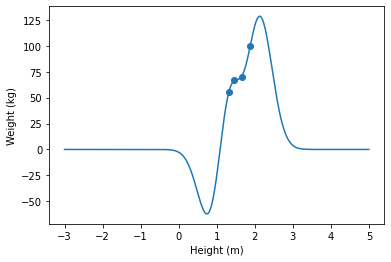

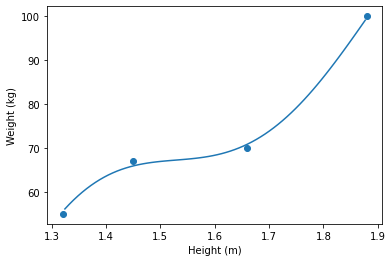

In [2]:
#Task1 Changing the Parameters

# I recommend playing around with these parameters and seeing how well you fit
# the data.  Changing one of the parameters will change the optimal value of the other:
sigma = 0.25 #smaller it gets, it makes the variance smaller
alpha = 0.0001

# New representation:
x = rbf_kernel(heights, centers, gamma=1.0 / sigma)
print("x.shape", x.shape)
print("Original inputs", heights)
print("RBF repr", x)

# Now go and fit a linear model between x and height
regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(x, weights)
print("Score on training data = ", regr.score(x, weights))
all_x = np.linspace(-3.0, 5.0, 1000).reshape(-1, 1)

# New representation:
expanded_x = rbf_kernel(all_x, centers, gamma=1.0 / sigma)
all_y = regr.predict(expanded_x)
print("all_x.shape", all_x.shape)
print("expanded_x.shape", expanded_x.shape)
print("all_y.shape", all_y.shape)

# Show that the predictions tend to zero far away from inputs
plt.figure()
plt.plot(all_x, all_y)
plt.scatter(heights, weights)
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")


# Zoom in and see how well predictions fit the data
zoom_ind = (all_x > heights.min()) & (all_x < heights.max())
plt.figure()
plt.plot(all_x[zoom_ind], all_y[zoom_ind])
plt.scatter(heights, weights)
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.show()

x.shape (4, 6)
Original inputs [[1.32]
 [1.45]
 [1.66]
 [1.88]]
RBF repr [[0.81481026 0.97161077 0.98728157 0.85487502 0.63077882 0.39661073]
 [0.66697681 0.8824969  0.99501248 0.95599748 0.78270454 0.54607443]
 [0.41844911 0.65494763 0.87354119 0.99282586 0.96155838 0.79358073]
 [0.21250282 0.39661073 0.63077882 0.85487502 0.98728157 0.97161077]]
Score on training data =  0.7150439791825811
all_x.shape (1000, 1)
expanded_x.shape (1000, 6)
all_y.shape (1000, 1)


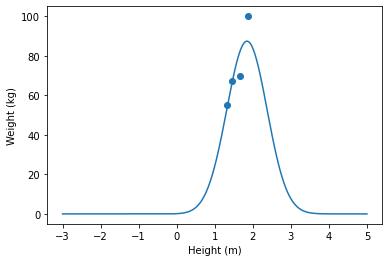

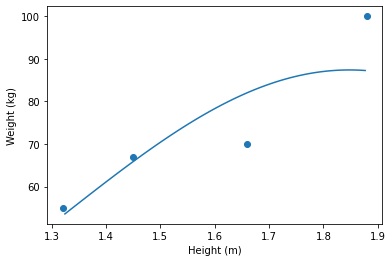

In [7]:
sigma = 0.5 #smaller it gets, it makes the variance smaller
alpha = 0.1 #makes the graph more smoother and smoother by making less fluctuations on the graph

# New representation:
x = rbf_kernel(heights, centers, gamma=1.0 / sigma)
print("x.shape", x.shape)
print("Original inputs", heights)
print("RBF repr", x)

# Now go and fit a linear model between x and height
regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(x, weights)
print("Score on training data = ", regr.score(x, weights))
all_x = np.linspace(-3.0, 5.0, 1000).reshape(-1, 1)

# New representation:
expanded_x = rbf_kernel(all_x, centers, gamma=1.0 / sigma)
all_y = regr.predict(expanded_x)
print("all_x.shape", all_x.shape)
print("expanded_x.shape", expanded_x.shape)
print("all_y.shape", all_y.shape)

# Show that the predictions tend to zero far away from inputs
plt.figure()
plt.plot(all_x, all_y)
plt.scatter(heights, weights)
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")


# Zoom in and see how well predictions fit the data
zoom_ind = (all_x > heights.min()) & (all_x < heights.max())
plt.figure()
plt.plot(all_x[zoom_ind], all_y[zoom_ind])
plt.scatter(heights, weights)
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.show()

### Task2

In [23]:
#Task 2
#Loading the data code from https://github.com/minerva-university/cs156/blob/master/session05/load.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.metrics as met
from sklearn.model_selection import train_test_split

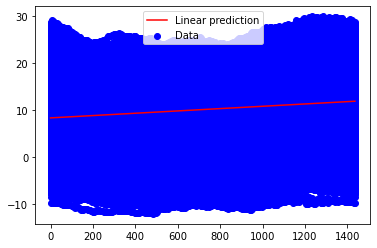

In [9]:
years = range(2011, 2017)
files = ['CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' % y for y in years]
usecols = [1, 2, 8]

data = [np.loadtxt(f, usecols=usecols) for f in files]
data = np.vstack(data)

# Map from HHmm to an integer
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)
valid = data[:, 2] > -1000

x_train = data[valid, 1].reshape(-1, 1)
y_train = data[valid, 2]
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

x_predict = [[0], [1435]]
y_predict = regr.predict(x_predict)

plt.scatter(data[valid, 1], data[valid, 2], label='Data', color='b')
plt.plot(x_predict, y_predict, label='Linear prediction', color='r')
plt.legend(loc='best')
plt.show()

In [20]:
#print the evaluations of the model
print("coeffs: ", regr.coef_, ', ',regr.intercept_)
print("MSE : ", mean_squared_error(x_predict, y_predict))
#print("median absolute error : ", met.median_absolute_error(y_test, y_predict))
#print("r2: ", met.r2_score(y_test, y_predict))
#print("mean absolute error: ", met.mean_absolute_error(y_test, y_predict))
print(data[:5])
print(len(data))

coeffs:  [0.00246839] ,  8.303444190210293
MSE :  1012718.7113515792
[[ 2.0110101e+07  5.0000000e+00 -6.4000000e+00]
 [ 2.0110101e+07  1.0000000e+01 -6.5000000e+00]
 [ 2.0110101e+07  1.5000000e+01 -6.5000000e+00]
 [ 2.0110101e+07  2.0000000e+01 -6.5000000e+00]
 [ 2.0110101e+07  2.5000000e+01 -6.7000000e+00]]
631296


In [25]:
#Make my own model
#difference from the given
##1. Makes a testing data
##2. Makes a ridge regression w K-fold cross validation

#1. Let's divide the train and test first. 
X = data[valid,1].reshape(-1,1)
y = data[valid,2]
##setting random seed as 42 for 'questions of life'
##data is quite big, (631296 data points). Thus, making 15% a testing dataset
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.15, random_state=42)


# use automatically configured the ridge regression algorithm
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#2. Doing the ridge regression
model = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
y_predict = model.predict(X_test)

alpha: 0.000000
coeffs:  [0.00246839] ,  8.303444190210293
MSE :  673996.9729920179
median absolute error :  5.902156424460074
r2:  0.018436199618990456
mean absolute error:  6.461985122243007


In [26]:
#print the evaluations of the model
print("coeffs: ", regr.coef_, ', ',regr.intercept_)
print("MSE : ", mean_squared_error(X_test, y_predict))
print("median absolute error : ", met.median_absolute_error(y_test, y_predict))
print("r2: ", met.r2_score(y_test, y_predict))
print("mean absolute error: ", met.mean_absolute_error(y_test, y_predict))

coeffs:  [0.00246839] ,  8.303444190210293
MSE :  673996.9729920179
median absolute error :  5.902156424460074
r2:  0.018436199618990456
mean absolute error:  6.461985122243007
